# SMA-based signal strategy

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import bt

In [10]:
price_data = pd.read_csv("../assets/GOOG.csv", index_col='Date', parse_dates=True)

## Calculate the simple moving average (SMA) 

In [15]:
sma = price_data.rolling(20).mean()

## Define the strategy

In [12]:
bt_strategy = bt.Strategy('AboveSMA', 
                          [bt.algos.SelectWhere(price_data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

## Create the backtest and run it

In [13]:
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


## Plot the backtest result

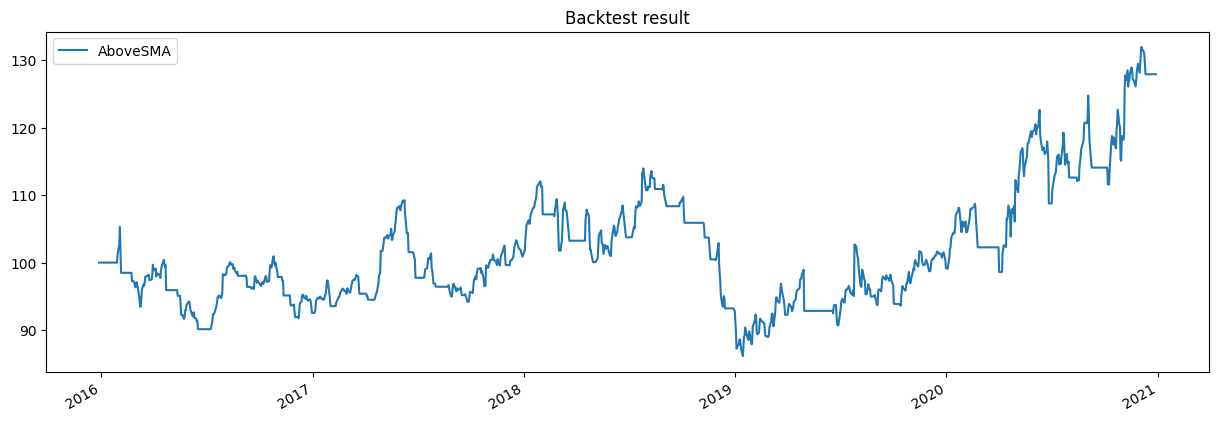

In [16]:

bt_result.plot(title='Backtest result')
plt.show()